In [1]:
import pandas as pd
import numpy as np 
import plotly_express as px 
from matplotlib import pyplot as plt 
import seaborn as sns 

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
data = pd.read_excel(r'Store project.xlsx',skiprows=4)
data.sample(10)

,Store ID,City,State,Sales_Region,New_Expansion,Cost,Revenue
215,213.00,Richmond,California,Region 2,Old,"2,898.00","42,721.00"
379,377.00,West Valley City,Utah,Region 2,Old,"2,740.00","25,854.00"
458,456.00,Yonkers,New York,Region 1,Old,"1,885.00","41,302.00"
484,482.00,Grand Rapids,Michigan,Region 1,Old,"3,211.00","52,020.00"
157,155.00,Overland Park,Kansas,Region 2,Old,"3,412.00","43,670.00"
315,313.00,Las Cruces,New Mexico,Region 2,Old,"2,864.00","60,457.00"
330,328.00,Salt Lake City,Utah,Region 2,Old,"1,957.00","65,675.00"
274,272.00,Mobile,Alabama,Region 1,Old,"10,457.00","114,897.00"
366,364.00,Little Rock,Arkansas,Region 2,Old,"2,385.00","66,904.00"
94,93.00,Elgin,Illinois,Region 1,Old,"3,774.00","63,471.00"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store ID       509 non-null    float64
 1   City           510 non-null    object 
 2   State          510 non-null    object 
 3   Sales_Region   510 non-null    object 
 4   New_Expansion  510 non-null    object 
 5   Cost           508 non-null    float64
 6   Revenue        509 non-null    float64
dtypes: float64(3), object(4)
memory usage: 28.2+ KB


In [4]:
data[['Cost','Revenue']].describe()

,Cost,Revenue
count,508.00,509.00
mean,"2,934.27","42,717.09"
std,"1,032.71","17,423.50"
min,400.00,"4,890.00"
25%,"2,300.50","28,828.00"
50%,"2,866.00","41,691.00"
75%,"3,431.00","56,616.00"
max,"13,678.00","120,387.00"


In [5]:
data.isnull().sum()

Store ID         4
City             3
State            3
Sales_Region     3
New_Expansion    3
Cost             5
Revenue          4
dtype: int64

In [6]:
df = data.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 512
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store ID       506 non-null    float64
 1   City           506 non-null    object 
 2   State          506 non-null    object 
 3   Sales_Region   506 non-null    object 
 4   New_Expansion  506 non-null    object 
 5   Cost           506 non-null    float64
 6   Revenue        506 non-null    float64
dtypes: float64(3), object(4)
memory usage: 31.6+ KB


In [7]:
for cols in df.columns:
    if 'ID' in cols or 'Cost' in cols or 'Revenue' in cols:
        df[cols] = df[cols].astype(int)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 512
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store ID       506 non-null    int32 
 1   City           506 non-null    object
 2   State          506 non-null    object
 3   Sales_Region   506 non-null    object
 4   New_Expansion  506 non-null    object
 5   Cost           506 non-null    int32 
 6   Revenue        506 non-null    int32 
dtypes: int32(3), object(4)
memory usage: 25.7+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_4676\3310924002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_4676\3310924002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_4676\3310924002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [8]:
df.sample(10)

,Store ID,City,State,Sales_Region,New_Expansion,Cost,Revenue
130,128,Columbus,Georgia,Region 1,Old,3921,38951
274,272,Mobile,Alabama,Region 1,Old,10457,114897
241,239,Vista,California,Region 2,Old,2798,17112
269,267,Shreveport,Louisiana,Region 1,Old,3308,49804
223,221,Lowell,Massachusetts,Region 1,Old,2995,16847
281,279,Moreno Valley,California,Region 2,Old,2831,61477
59,58,Waterbury,Connecticut,Region 1,Old,2161,61470
305,303,Spokane,Washington,Region 2,Old,2255,64516
64,63,Richmond,California,Region 2,Old,3201,29117
239,237,Amarillo,Texas,Region 2,Old,3335,27527


In [9]:
df['Profit'] = df['Revenue'] - df['Cost']

C:\Users\HP\AppData\Local\Temp\ipykernel_4676\1346697774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Revenue'] - df['Cost']


In [10]:
df.sample(10)

,Store ID,City,State,Sales_Region,New_Expansion,Cost,Revenue,Profit
455,453,Spokane,Washington,Region 2,Old,3601,50985,47384
8,9,Worcester,Massachusetts,Region 1,Old,3181,42855,39674
54,53,Manchester,New Hampshire,Region 1,Old,3950,57927,53977
340,338,Oxnard,California,Region 2,Old,3882,35815,31933
501,499,San Angelo,Texas,Region 2,Old,2000,68172,66172
50,50,Olathe,Kansas,Region 2,Old,3311,58498,55187
386,384,Cambridge,Massachusetts,Region 1,Old,2072,61462,59390
343,341,Syracuse,New York,Region 1,Old,2465,41965,39500
481,479,Waco,Texas,Region 2,Old,2748,53130,50382
491,489,Miramar,Florida,Region 1,Old,3893,68791,64898


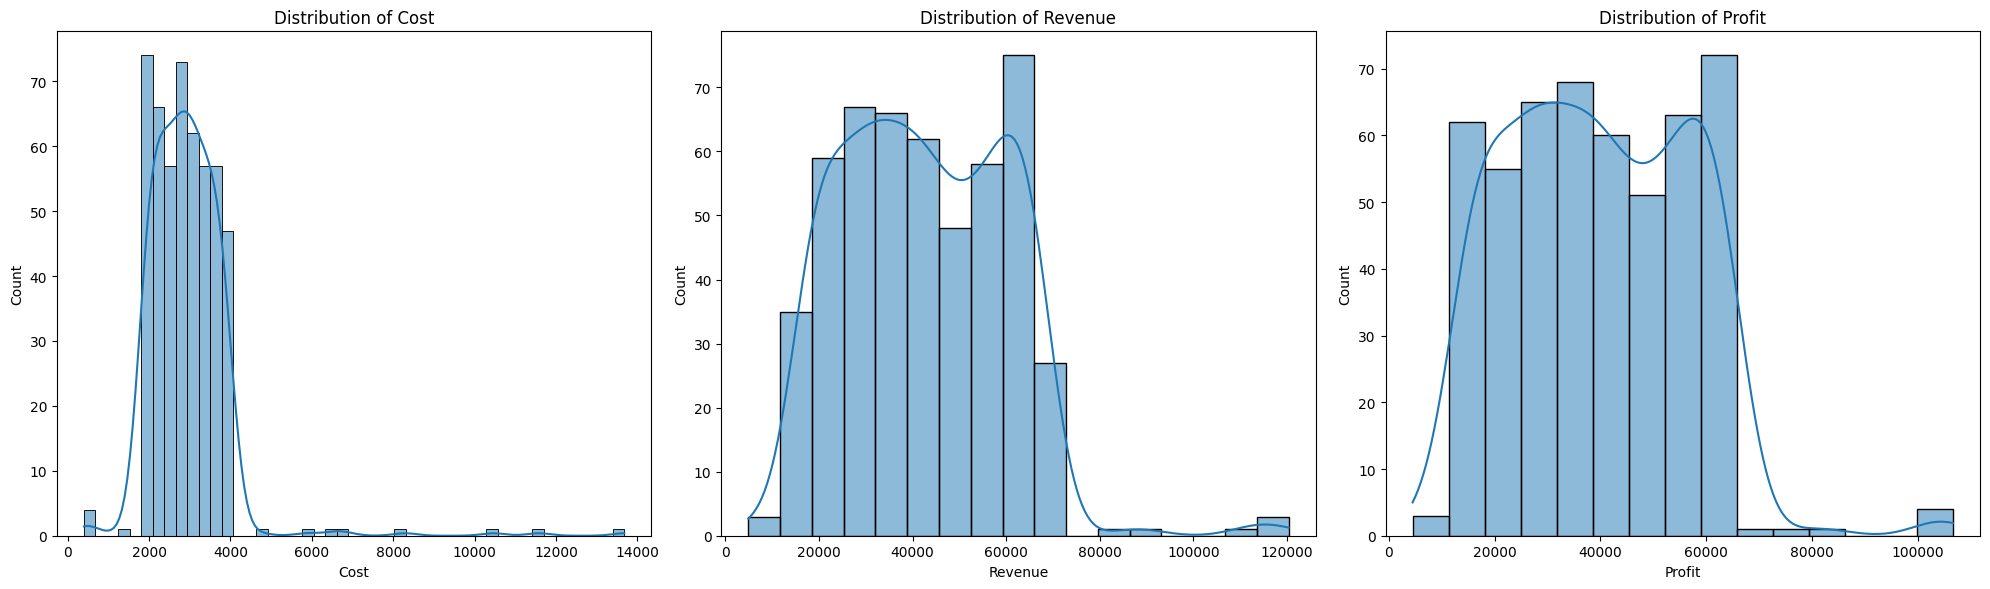

In [11]:
plt.figure(figsize=(20,6))
for e, i in enumerate(df.columns[5:]):
    plt.subplot(1, 3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.tight_layout();

In [14]:
min = df.Cost.min()
Q1 = df.Cost.quantile(0.25)
Q2 = df.Cost.median()
Q3 = df.Cost.quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

print(f' min = {min} , Q1 = {Q1} , Q2 = {Q2} , Q3 = {Q3} , IQR = {IQR} , LB = {LB} , UB = {UB}')


 min = 400 , Q1 = 2301.75 , Q2 = 2868.0 , Q3 = 3431.0 , IQR = 1129.25 , LB = 607.875 , UB = 5124.875


In [17]:
import nbformat
print(nbformat.__version__)

5.10.4


In [16]:
px.box(data_frame= df , x= 'Cost')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Cost=%{x}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'box',
              'x': array([2179, 2624, 2164, ..., 2897, 2419, 2866]),
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Cost'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

In [19]:
df[df.Cost > UB].count()

Store ID         7
City             7
State            7
Sales_Region     7
New_Expansion    7
Cost             7
Revenue          7
Profit           7
dtype: int64

In [20]:
df[df.Cost < LB].count()

Store ID         4
City             4
State            4
Sales_Region     4
New_Expansion    4
Cost             4
Revenue          4
Profit           4
dtype: int64

In [22]:
df = df[df.Cost < 5200]
df = df[df.Cost > 1100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 512
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store ID       495 non-null    int32 
 1   City           495 non-null    object
 2   State          495 non-null    object
 3   Sales_Region   495 non-null    object
 4   New_Expansion  495 non-null    object
 5   Cost           495 non-null    int32 
 6   Revenue        495 non-null    int32 
 7   Profit         495 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 27.1+ KB


In [23]:
df.to_excel('Stores_report.xlsx')